# Load Data

In [1]:
from ipywidgets import interact, interact_manual
import ipywidgets as widgets
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas_profiling
import sys
sys.path.append("..")
from src import tools
%matplotlib inline

def absoluteFilePaths(directory):
    for dirpath, _, filenames in os.walk(directory):
        for f in filenames:
            if str(f)[0] == '.':
                pass
            else:
                yield os.path.abspath(os.path.join(dirpath, f))

FOLDER = "../outputs/fb/summary/"
                
def load_data(folder):
    files = absoluteFilePaths(folder)
    users = []
    data = {}
    for f in files:
        df = pd.read_csv(f)
        user = df.user.iloc[0]
        data.update({user: df})
    return data

data = load_data(FOLDER)
print(data.keys())

dict_keys(['gelato-pizza-zucchini', 'eggs-macaroon-pretzel', 'fennel-tea-lime', 'mango-macaroons-macaroni', 'yams-pomelo-guava', 'yolk-carnitas-date', 'pickles-coleslaw-rhubarb', 'asparagus-croissant-kiwi', 'vanilla-bokchoy-corn', 'coleslaw-ceviche-broccoli', 'parsnip-lentils-fudge', 'waffle-hamburger-souffle', 'quince-peanut-molasses', 'croissant-watercress-pudding', 'kale-sushi-eggs', 'coconut-fudge-mandarin', 'pimiento-cranberry-samosa', 'vinegar-arrugula-biscuit', 'hummus-orzo-romaine', 'pistachio-salsa-tangelo'])


# Clean Data

### Drop columns, set datetimeindex, fill missing data and generate statistics.

In [2]:
stats = pd.DataFrame(columns=['start', 'end',
                              'average_impression_count',
                              'timelines',
                              'total_entries',
                              'missing values'
                              ])

for user, df in data.items():
    try:
        df = df.drop('Unnamed: 0', 1)
    except:
        pass

    df = df[['impressionTime', 'impressionOrder',  'id',
             'nature',  'postId', 'publicationTime', 'permaLink',
             'source', 'sourceLink', 'fblinktype',
             'texts', 'textsize', 'images',
             'semanticCount', 'semanticId', 'timeline', 'user']]

    df.index = df['impressionTime']
    df.index = pd.to_datetime(df.index)
    # end date, start date; format: YYYY-MM-DD
    df = df['2020-02-06':'2019-10-15']

    df.publicationTime = pd.to_datetime(df.publicationTime)
    df.impressionOrder = pd.to_numeric(df.impressionOrder, downcast='integer')

    df = df.replace("nan", np.nan)
    df = df.replace("", np.nan)
    df['fblinktype'] = df['fblinktype'].fillna('other')

    # AUTOMATE THIS
    dictionary = {
        'https://www.facebook.com/AgenziaANSA/': 'ANSA.it',
        'https://www.facebook.com/AgenziaAdnKronos/': 'Adnkronos',
        'https://www.facebook.com/corrieredellasera/': 'Corriere della Sera',
        'https://www.facebook.com/giorgiameloni.paginaufficiale/': 'Giorgia Meloni',
        'https://www.facebook.com/HuffPostItalia/': 'HuffPost Italia',
        'https://www.facebook.com/ilfoglio/': 'Il Foglio',
        'https://www.facebook.com/ilGiornale/': 'Il Giornale',
        'https://www.facebook.com/italiaviva/': 'Italia Viva',
        'https://www.facebook.com/la7fb/': 'La7',
        'https://www.facebook.com/lastampa.it/': 'La Stampa',
        'https://www.facebook.com/legasalvinipremier/': 'Lega - Salvini Premier',
        'https://www.facebook.com/liberonews/': 'Libero',
        'https://www.facebook.com/LuigiDiMaio/': 'Luigi Di Maio',
        'https://www.facebook.com/matteorenziufficiale/': 'Matteo Renzi',
        'https://www.facebook.com/Messaggero.it/': 'Il Messaggero.it',
        'https://www.facebook.com/partitodemocratico/': 'Partito Democratico',
        'https://www.facebook.com/rainews.it/': 'Rainews.it',
        'https://www.facebook.com/Repubblica/': 'la Repubblica',
        'https://www.facebook.com/salviniofficial/': 'Matteo Salvini'}

    df['source'] = df['source'].fillna(df['sourceLink'])
    df = df.replace({"source": dictionary})

    stats.loc[user] = [
        df.impressionTime.min(),
        df.impressionTime.max(),
        # max(df.impressionOrder),
        #min(df.groupby(['timeline'], sort=False)['impressionOrder'].max()),
        df.impressionOrder.mean(),
        df['timeline'].nunique(),
        df['id'].count(),
        df.isna().sum().sum()
    ]
    data[user] = df.copy()


stats

,start,end,average_impression_count,timelines,total_entries,missing values
gelato-pizza-zucchini,2019-10-22 11:01:56+00:00,2020-02-03 15:07:48+00:00,19.177669,961,18163,432
eggs-macaroon-pretzel,2019-10-21 15:53:23+00:00,2020-02-03 15:07:39+00:00,18.575860,986,19279,501
fennel-tea-lime,2019-10-21 09:34:22+00:00,2020-01-01 19:06:06+00:00,19.410764,777,14512,442
mango-macaroons-macaroni,2019-10-16 14:46:34+00:00,2020-02-05 08:15:08+00:00,19.510745,884,15217,3394
yams-pomelo-guava,2019-10-21 16:53:49+00:00,2020-01-13 19:06:09+00:00,19.244684,955,18530,585
yolk-carnitas-date,2019-10-19 10:45:02+00:00,2020-02-03 15:07:36+00:00,20.215725,990,19358,24155
pickles-coleslaw-rhubarb,2019-10-20 12:34:11+00:00,2020-02-05 10:07:40+00:00,18.742486,912,16702,517
asparagus-croissant-kiwi,2019-10-19 11:11:43+00:00,2020-02-03 15:07:25+00:00,18.732350,917,16955,400
vanilla-bokchoy-corn,2019-10-21 10:35:13+00:00,2020-01-30 10:05:45+00:00,19.732927,822,14423,18128
coleslaw-ceviche-broccoli,2019-10-20 11:08:47+00:00,2020-02-03 07:20:07+00:00,19.142758,947,17253,23709


### Generate profile report (takes a while)

In [3]:
#data['parsnip-lentils-fudge'].drop('impressionTime',1).profile_report(check_correlation_cramers=False,
#                  check_correlation_pearson=False,
#                  cardinality_threshold=len(df)*0.9,
#                  style={'full_width':True}
#                                          )

### Plot posts collected per day per user (interactive)

In [4]:
df = pd.concat(data.values())


def dailyPostCountGraph(df, user):
    data = tools.setDatetimeIndexFloor(tools.setDatetimeIndex(df), what="1D")
    data = data.groupby(data.index).id.count()
    data = data.to_frame()

    fig, ax = plt.subplots(figsize=(15, 7))

    # set ticks every week
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax.set_title('Number of posts collected per day for user: '+user)
    ax.bar(data.index, data.id)
    return(fig, ax)


#fig, ax = (dailyPostCountGraph(df, user))

@interact
def show_plot(user=df['user'].unique()):
    return dailyPostCountGraph(data[user], user)

interactive(children=(Dropdown(description='user', options=('gelato-pizza-zucchini', 'eggs-macaroon-pretzel', …

### Column entries collected per user per day 

In [5]:
def dailyPostCountColumnGraph(df, user, column):
    data = tools.setDatetimeIndexFloor(tools.setDatetimeIndex(df), what="1D")
    data = data.groupby(data.index)[column].count()
    data = data.to_frame()

    fig, ax = plt.subplots(figsize=(15, 7))

    # set ticks every week
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax.set_title('Number of entries in col '+column +
                 ' collected per day for: '+user)
    ax.bar(data.index, data[column])
    return(fig, ax)


#fig, ax = (dailyPostCountGraph(df, user))

@interact
def show_plot(user=df['user'].unique(), column=df.columns):
    return dailyPostCountColumnGraph(data[user], user, column)

interactive(children=(Dropdown(description='user', options=('gelato-pizza-zucchini', 'eggs-macaroon-pretzel', …

### Second cleaning: remove rows with missing source, reduce columns.

In [6]:
def clean(df):
    #df = df[pd.notnull(df['postId'])]
    df = df[pd.notnull(df['source'])]
    df = df[['impressionOrder', 'id', 'nature',
             'source', 'fblinktype',
             'texts', 'textsize',
             'timeline', 'user']]
    return df


cleaned_df = clean(df)

display(cleaned_df)

,impressionOrder,id,nature,source,fblinktype,texts,textsize,timeline,user
impressionTime,,,,,,,,,
2020-02-03 15:07:48+00:00,47,4774f551186fefaa3ae6e6473cbd29e5377498be,organic,Partito Democratico,photo,"[""È sempre più chiaro che l’Italia ha una prio...",281,cranberry-kumquat-kebab,gelato-pizza-zucchini
2020-02-03 15:07:47+00:00,46,e9d3845b5bf9ccdf5a1633eb76756f10656d1519,sponsored,Rabobank,other,['Zien waar je geld naartoe gaat? Onze app cat...,109,cranberry-kumquat-kebab,gelato-pizza-zucchini
2020-02-03 15:07:46+00:00,43,b8ff0783953c0374a0f77c1f30826ca44382aa62,organic,la Repubblica,posts,['Miss Italia 2015 ripercorre il suo periodo b...,320,cranberry-kumquat-kebab,gelato-pizza-zucchini
2020-02-03 15:07:46+00:00,44,26cfafb1f2dc7bf3080061a6e5b6a3b331a8fe98,organic,Corriere della Sera,posts,['Ha avuto risultati promettenti su una pazien...,406,cranberry-kumquat-kebab,gelato-pizza-zucchini
2020-02-03 15:07:46+00:00,45,66c94596e208fc5a6800227f9be2fa5d42989e93,organic,La Stampa,posts,['Monica De Re ha reso creativa la passione pe...,391,cranberry-kumquat-kebab,gelato-pizza-zucchini
...,...,...,...,...,...,...,...,...,...
2019-10-22 16:11:02+00:00,3,f4d306876e71516aa3f4ad04c40283696d6ca354,organic,Luigi Di Maio,posts,"['++IMPORTANTE++', ' Ho due BUONE NOTIZIE per ...",1410,cheese-apple-cucumber,pistachio-salsa-tangelo
2019-10-22 16:10:58+00:00,1,8cdb65f1b529a4663cc51c0b307c4d8b6873ada1,organic,Matteo Renzi,photo,[''],0,cheese-apple-cucumber,pistachio-salsa-tangelo
2019-10-22 14:39:24+00:00,1,7ebf47e2039187af1d4ae7bd76283067f037bb94,organic,Goodful,videos,['Making this for brunch this weekend 💯👌 Full ...,105,jelly-pasta-coffee,pistachio-salsa-tangelo


### Generate another profile report (still takes a while)

In [7]:
#cleaned_df.profile_report(check_correlation_cramers=False,
#                          check_correlation_pearson=False,
#                          cardinality_threshold=len(df)*0.9,
#                          style={'full_width': True})

### Trim dates and check post count per user (interactive)

In [8]:
def datesPostCountGraph(df, user):
    data = tools.setDatetimeIndexFloor(df, what="1D")
    data = data.groupby(data.index).id.count()
    data = data.to_frame()

    fig, ax = plt.subplots(figsize=(15, 7))

    # set ticks every week
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax.set_title('Number of posts collected per day for user: '+user)
    ax.bar(data.index, data.id)
    return(fig, ax)


#fig, ax = (dailyPostCountGraph(df, user))

@interact
def show_plot(user=cleaned_df['user'].unique(), start_date="2019-10-12", end_date="2020-01-03"):
    mask = (cleaned_df['user'] == user)
    return datesPostCountGraph(cleaned_df[mask].loc[end_date:start_date], user)

interactive(children=(Dropdown(description='user', options=('gelato-pizza-zucchini', 'eggs-macaroon-pretzel', …

### Group per day then count total ids: how many total entries i would be left with if i was to trim days that have less than n entries?

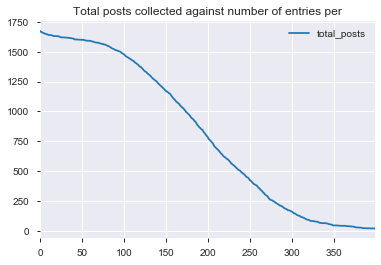

In [9]:
def dailyPostCount(df):
    data = tools.setDatetimeIndexFloor(df, what="1D")
    data = data.groupby([data.index, data.user]).id.count()
    data = data.to_frame()
    return data


count = dailyPostCount(cleaned_df)

where_to_cut = pd.DataFrame(columns=['total_posts'])
for i in range(0, 400):
    l = len(count[(count['id'] > i)])

    where_to_cut.loc[i] = [
        l
    ]
where_to_cut.plot(title='Total posts collected against number of entries per')

### Generate stats for the cleaned dataframe, check if the result is satisfying.

In [10]:
stats = pd.DataFrame(columns=['start', 'end',
                              'average_impression_count',
                              'timelines',
                              'total_entries',
                              'missing values'
                              ])
def getStats(df):
    user_list = df.user.unique()
    for user in user_list:
        data = df[(df['user'] == user)]

        stats.loc[user] = [
            data.index.min(),
            data.index.max(),
            # max(df.impressionOrder),
            #min(df.groupby(['timeline'], sort=False)['impressionOrder'].max()),
            data.impressionOrder.mean(),
            data['timeline'].nunique(),
            data['id'].count(),
            data.isna().sum().sum()
        ]
    return stats

stats = getStats(cleaned_df)

stats

,start,end,average_impression_count,timelines,total_entries,missing values
gelato-pizza-zucchini,2019-10-22 00:00:00+00:00,2020-02-03 00:00:00+00:00,19.177669,961,18163,0
eggs-macaroon-pretzel,2019-10-21 00:00:00+00:00,2020-02-03 00:00:00+00:00,18.575860,986,19279,0
fennel-tea-lime,2019-10-21 00:00:00+00:00,2020-01-01 00:00:00+00:00,19.410764,777,14512,0
mango-macaroons-macaroni,2019-10-16 00:00:00+00:00,2020-02-05 00:00:00+00:00,19.510745,884,15217,0
yams-pomelo-guava,2019-10-21 00:00:00+00:00,2020-01-13 00:00:00+00:00,19.244684,955,18530,0
yolk-carnitas-date,2019-10-19 00:00:00+00:00,2020-02-03 00:00:00+00:00,20.215725,990,19358,1
pickles-coleslaw-rhubarb,2019-10-20 00:00:00+00:00,2020-02-05 00:00:00+00:00,18.742486,912,16702,0
asparagus-croissant-kiwi,2019-10-19 00:00:00+00:00,2020-02-03 00:00:00+00:00,18.732350,917,16955,0
vanilla-bokchoy-corn,2019-10-21 00:00:00+00:00,2020-01-30 00:00:00+00:00,19.732927,822,14423,0
coleslaw-ceviche-broccoli,2019-10-20 00:00:00+00:00,2020-02-03 00:00:00+00:00,19.142758,947,17253,0


### What is the timeframe that all users have in common?

In [11]:
stats.start.max(), stats.end.min()

(Timestamp('2019-10-22 00:00:00+0000', tz='UTC'),
 Timestamp('2019-12-29 00:00:00+0000', tz='UTC'))

### Set list of polarized users

In [12]:
polarized = ['kale-sushi-eggs',
             'pickles-coleslaw-rhubarb',
             'parsnip-lentils-fudge',
             'yams-pomelo-guava',
             'eggs-macaroon-pretzel',
             'croissant-watercress-pudding',
             'yolk-carnitas-date',
             'asparagus-croissant-kiwi',
             'coleslaw-ceviche-broccoli'
             'coconut-fudge-mandarin'
             ]

### Distribution of maximum lenght of timelines

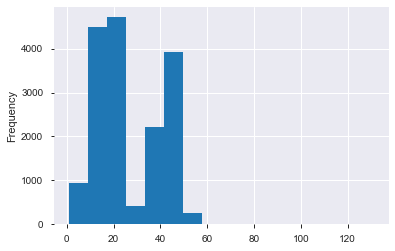

In [13]:
cleaned_df.groupby(['timeline'])['impressionOrder'].max().plot.hist(bins=16)

### Reduce number of columns (again)

In [14]:
cleaned_df = cleaned_df[['impressionOrder', 'id', 'nature', 
          'source',  'fblinktype', 'texts',
         'textsize', 'timeline', 'user']]

### Replace pseudo-names with "real" user names

In [15]:
user_names = pd.read_csv("../config/users.csv")
names_dict = {}

for name, number, token in user_names.values:
    temp_df = pd.read_csv('../outputs/fb/summary/'+token+'.csv', nrows=2)
    names_dict[temp_df.user[0]] = name

df = df.replace({"user": names_dict})

### Count number of users and timeline per hour of data collection

,names,users_count,timelines,timelines_count
impressionTime,,,,
2019-10-16 14:00:00+00:00,[Nienke],1,[taco-grapefruit-souffle],1
2019-10-16 19:00:00+00:00,[Nienke],1,[raspberry-caramel-pear],1
2019-10-19 10:00:00+00:00,[Gert],1,[pistachio-sandwich-milk],1
2019-10-19 11:00:00+00:00,[Hanneke],1,[baklava-chocolate-ginger],1
2019-10-20 11:00:00+00:00,"[Ivo, Juultje]",2,"[pie-celery-celery, tofu-manicotti-blueberry]",2
...,...,...,...,...
2020-02-04 19:00:00+00:00,"[Bjoke, Aarend, Terese]",3,"[pepper-nachos-feta, jelly-alfalfa-pasta, leek...",3
2020-02-05 07:00:00+00:00,"[Bjoke, Aarend, Terese]",3,"[papaya-corn-pistachio, tofu-pistachio-raspber...",3
2020-02-05 08:00:00+00:00,"[Nienke, Bjoke, Aarend, Terese]",4,"[tangelo-alfalfa-prune, berry-tangelo-kumquat,...",4


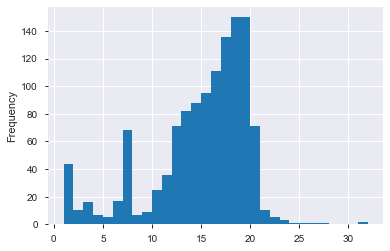

In [16]:

result = df
result.index = result.index.floor('H')
names = result.groupby(df.index).user.unique()
timelines = result.groupby(df.index).timeline.unique()
result = pd.DataFrame(names)
result.columns = ['names']
result['users_count'] = result['names'].str.len()
result['timelines'] = timelines
result['timelines_count'] = result['timelines'].str.len()
display(result)

# result.users_count.plot.hist(bins=5)
result.timelines_count.plot.hist(bins=31)

### Distribution of number of timelines per hour

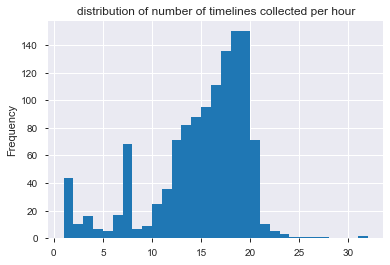

In [17]:
result.timelines_count.plot.hist(bins=31, title='distribution of number of timelines collected per hour')

### Distribution of number of active (collecting data) users per hour

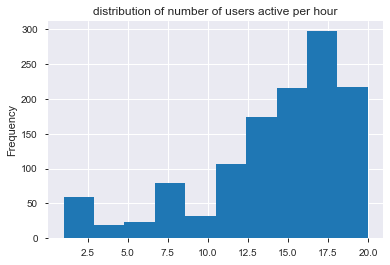

In [18]:
result.users_count.plot.hist(
    bins=10, title='distribution of number of users active per hour')

### How many hours of data do i get if i only select hours where at least n users were collecting data?

In [19]:
print('timelines seen by all users: ' +
      str(len(result[(result['users_count'] == 20) & (result['timelines_count'] == 20)]))+' hours')

print('timelines seen by all users with multiple timelines in an hour: ' +
      str(len(result[(result['users_count'] == 20) & (result['timelines_count'] >= 20)]))+' hours')

print('timelines seen by at least 16 users: ' +
      str(len(result[(result['users_count'] >= 16) & (result['timelines_count'] >= 16)]))+' hours')

print('timelines seen by at least 10 users: ' +
      str(len(result[(result['users_count'] >= 10) & (result['timelines_count'] >= 10)]))+' hours')

print('all data: '+str(len(result))+' hours')

timelines seen by all users: 56 hours
timelines seen by all users with multiple timelines in an hour: 66 hours
timelines seen by at least 16 users: 632 hours
timelines seen by at least 10 users: 1036 hours
all data: 1222 hours


### How many hours per day have been collected by all the users?

#### All data in timeframe

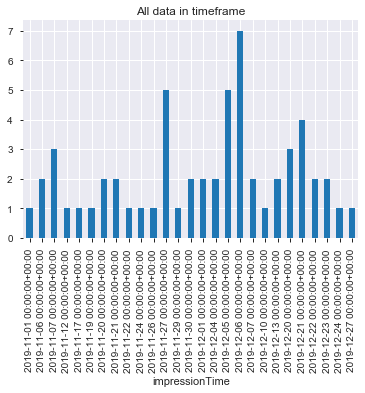

In [20]:

trimmed = result[(result['users_count'] == 20)]
trimmed = trimmed.loc['2019-11-01':'2019-12-31']
trimmed.users_count.groupby(trimmed.index.floor('D')).count().plot.bar(title='All data in timeframe')


#### Pre-polarisation

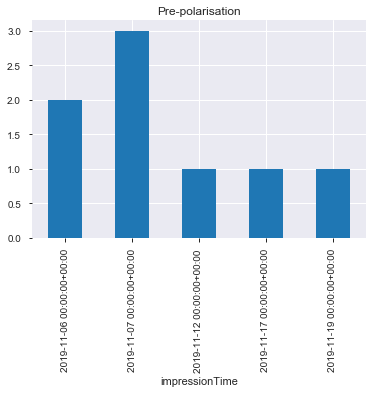

In [21]:
trimmed = result[(result['users_count'] == 20)]
trimmed = trimmed.loc['2019-11-02':'2019-11-19']
trimmed.users_count.groupby(trimmed.index.floor('D')).count().plot.bar(title='Pre-polarisation')


#### During-polarisation

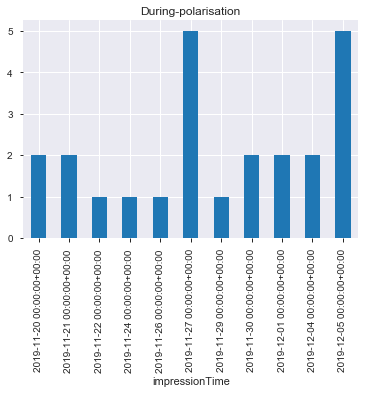

In [22]:
trimmed = result[(result['users_count'] == 20)]
trimmed = trimmed.loc['2019-11-20':'2019-12-05']
trimmed.users_count.groupby(trimmed.index.floor('D')).count().plot.bar(title='During-polarisation')


#### Polarized without external pages

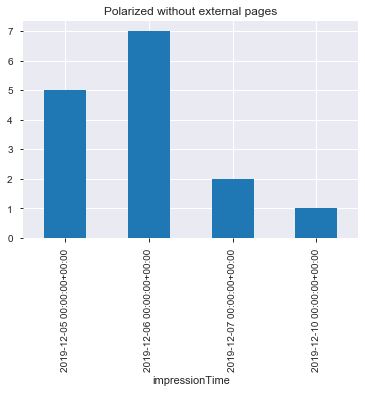

In [23]:

trimmed = result[(result['users_count'] == 20)]
trimmed = trimmed.loc['2019-12-05':'2019-12-10']
trimmed.users_count.groupby(trimmed.index.floor('D')).count().plot.bar(title='Polarized without external pages')


#### Post-polarisation and post-external-likes

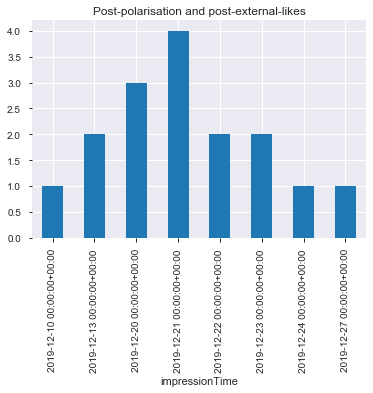

In [24]:
trimmed = result[(result['users_count'] == 20)]
trimmed = trimmed.loc['2019-12-10':'2019-12-27']
trimmed.users_count.groupby(trimmed.index.floor('D')).count().plot.bar(title='Post-polarisation and post-external-likes')


### Remove entire timelines that have less than 10 entries

In [25]:
df_wip = cleaned_df.loc['2019-11-01':'2019-12-31']
timelines = df_wip.groupby('timeline')['impressionOrder'].max()

print(len(df_wip))
df_wip = df_wip[df_wip.timeline.isin(list(timelines[timelines>10].index))]
print(len(df_wip[df_wip.timeline.isin(list(timelines[timelines>10].index))]))

232162
225997


In order to understand what is the best combination of users which will provide the longest dataset possible given a minimun number of users, we must:
- generate list of lists with the possible combinations >= of 16 elements (8 per group)
- filter df and check len by combination
- output top 5 combinations with len

### What is the combination of 16 or more users i should use to as much data as possible?

#### Generate list of all the possible combinations >= 16 elements

In [26]:
import itertools

list_of_all_users_name = sorted(trimmed.names.iloc[0])
print(list_of_all_users_name)

combinations = set(list(itertools.combinations(list_of_all_users_name, 16)))

['Aarend', 'Bjoke', 'Cor Timmerman', 'Doortje', 'Erwijn', 'Friedie', 'Gert', 'Hanneke', 'Ivo', 'Juultje', 'Kris', 'Lonneke', 'Martijn', 'Nienke', 'Omar', 'Phoebe', 'Quintijn', 'Roelfke', 'Stephan', 'Terese']


#### Prepare dataframe

In [27]:
result.names = result.names.apply(sorted)
result = result[result['users_count']>=16]
result = result.loc['2019-11-01':'2019-12-31']


#### Prepare dictionary with possible combinations and count (takes a while)

In [41]:
# i have a pandas dataframe name 'result' with a column 'names' that contains a list of strings
# with a variable number of 20 unique values
# i have a list of lists named 'combinations' with all the possible combinations with >= 16 elements
# i need to find the combination that maintains the longest dataframe
from IPython.display import clear_output, display


d = {}
n = 0
for i in combinations:
    n += 1
    clear_output(wait=True)
    print(str(n)+'/'+str(len(combinations)))
    for index, row in result.iterrows():
        check =  all(item in row.names for item in i)
        if check:
            nam = str(i)
            if nam in d:
                d[nam] += 1
            else:
                d[nam] = 1
        else :
            pass
        

4845/4845


#### What is the best combination of users?

In [42]:
{k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse = True)}

{"('Aarend', 'Bjoke', 'Cor Timmerman', 'Doortje', 'Erwijn', 'Hanneke', 'Juultje', 'Kris', 'Lonneke', 'Martijn', 'Nienke', 'Omar', 'Phoebe', 'Quintijn', 'Stephan', 'Terese')": 138,
 "('Aarend', 'Bjoke', 'Cor Timmerman', 'Doortje', 'Gert', 'Hanneke', 'Ivo', 'Juultje', 'Kris', 'Lonneke', 'Martijn', 'Nienke', 'Omar', 'Phoebe', 'Quintijn', 'Stephan')": 135,
 "('Aarend', 'Bjoke', 'Cor Timmerman', 'Doortje', 'Hanneke', 'Ivo', 'Juultje', 'Kris', 'Lonneke', 'Martijn', 'Nienke', 'Omar', 'Phoebe', 'Quintijn', 'Stephan', 'Terese')": 135,
 "('Aarend', 'Bjoke', 'Cor Timmerman', 'Doortje', 'Gert', 'Hanneke', 'Ivo', 'Juultje', 'Kris', 'Lonneke', 'Martijn', 'Nienke', 'Omar', 'Phoebe', 'Stephan', 'Terese')": 133,
 "('Aarend', 'Bjoke', 'Cor Timmerman', 'Doortje', 'Gert', 'Hanneke', 'Juultje', 'Kris', 'Lonneke', 'Martijn', 'Nienke', 'Omar', 'Phoebe', 'Quintijn', 'Stephan', 'Terese')": 132,
 "('Aarend', 'Bjoke', 'Cor Timmerman', 'Doortje', 'Gert', 'Hanneke', 'Ivo', 'Juultje', 'Kris', 'Lonneke', 'Martijn', 

Now we know that the best combination of users is "('Aarend', 'Bjoke', 'Cor Timmerman', 'Doortje', 'Erwijn', 'Hanneke', 'Juultje', 'Kris', 'Lonneke', 'Martijn', 'Nienke', 'Omar', 'Phoebe', 'Quintijn', 'Stephan', 'Terese')" with 138 timelines. we want a list of these 138 timelines in order to filter the dataframe and only keep those.

In [50]:
#display(result.names[0])

filter_lst = ['Aarend', 'Bjoke', 'Cor Timmerman', 'Doortje', 'Erwijn', 'Hanneke', 'Juultje', 'Kris', 'Lonneke', 'Martijn', 'Nienke', 'Omar', 'Phoebe', 'Quintijn', 'Stephan', 'Terese']

result
#print(len(result))
#print(len(result[result['names'].apply(lambda x: filter_lst in x)]))

len(result)
len(result[result.names.contains(filter_lst)])

all(element in list1 for element in list2)

#filter_str

check = all(filter_list, result.names)


AttributeError: 'Series' object has no attribute 'contains'

### Remove all timelines that have less than 10 entries

In [ ]:
# create a list of all timelines in dataframe that have less than x entries
df_wip = cleaned_df.loc['2019-11-01':'2019-12-31']
timelines = df_wip.groupby('timeline')['impressionOrder'].max()

print(len(df_wip))
df_wip = df_wip[df_wip.timeline.isin(list(timelines[timelines>10].index))]
print(len(df_wip))

In [40]:
df_wip

,impressionOrder,id,nature,source,fblinktype,texts,textsize,timeline,user
impressionTime,,,,,,,,,
2019-12-31 00:00:00+00:00,17,66c109d557614efbee62abdbf6128d0ab3c9de10,sponsored,NRC,other,['Stap uit je bubbel en wapen je tegen fake ne...,205,corn-caramel-waffle,gelato-pizza-zucchini
2019-12-31 00:00:00+00:00,18,99b81dc1728954cfe1310f9d62b0519ea7e4b2a4,organic,il manifesto,posts,['Il 2019 che abbiamo visto sfilare sulle stra...,603,corn-caramel-waffle,gelato-pizza-zucchini
2019-12-31 00:00:00+00:00,19,28f4a3d834d8d040bd0c95d73552e63d9c9aca91,organic,Il Messaggero.it,posts,"['++ FLASH NEWS ++', 'Roma, scontro tra moto e...",325,corn-caramel-waffle,gelato-pizza-zucchini
2019-12-31 00:00:00+00:00,20,6fb4ee0803e9a483890b65a5e61f80e44278ab8f,organic,MoVimento 5 Stelle,photo,['Buone Feste a tutti. Facciamoci un regalo: S...,509,corn-caramel-waffle,gelato-pizza-zucchini
2019-12-31 00:00:00+00:00,21,1cffd03f8fd3ad3df47aee160dfb917f75b8a394,organic,Sky TG24,posts,['Le parole dei vincitori dopo 10 chilometri d...,161,corn-caramel-waffle,gelato-pizza-zucchini
...,...,...,...,...,...,...,...,...,...
2019-11-01 00:00:00+00:00,6,9e39566dd69e34604c4904a36af0b7c1a4e62f8a,organic,Il Sole 24 ORE,posts,['La scuola non risarcisce i genitori il cui u...,220,icecream-souffle-succotash,pistachio-salsa-tangelo
2019-11-01 00:00:00+00:00,3,0f577979cd1ad68dba703ebbdef557afe60d9514,organic,La Nazione,posts,"['La burocrazia spaventosa, incapace di dare ...",467,icecream-souffle-succotash,pistachio-salsa-tangelo
2019-11-01 00:00:00+00:00,4,3c98e3dcc4637b75ecea69f472a8cdebf36ab712,organic,Il Foglio,posts,['Dai rifiuti all’ideologia. Perché il cortoci...,341,icecream-souffle-succotash,pistachio-salsa-tangelo
